In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('HousePricePrediction.xlsx')

In [3]:
# Step 1: Data Cleaning
print("Initial Dataset Shape:", df.shape)

Initial Dataset Shape: (2919, 13)


In [4]:
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [6]:
## dropping the unnessary columns
df.drop(['Id'],axis=1,inplace=True)

In [7]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [8]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [9]:

# Step 3: Standardizing Column Names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Handle Missing Values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['mssubclass', 'lotarea', 'overallcond', 'yearbuilt', 'yearremodadd',
       'bsmtfinsf2', 'totalbsmtsf', 'saleprice'],
      dtype='object')
Index(['mszoning', 'lotconfig', 'bldgtype', 'exterior1st'], dtype='object')


In [10]:
## dropping the null values of dataset

df = df.dropna()


In [11]:
df

,mssubclass,mszoning,lotarea,lotconfig,bldgtype,overallcond,yearbuilt,yearremodadd,exterior1st,bsmtfinsf2,totalbsmtsf,saleprice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [12]:
## finding the null values
df.isnull().sum()


mssubclass      0
mszoning        0
lotarea         0
lotconfig       0
bldgtype        0
overallcond     0
yearbuilt       0
yearremodadd    0
exterior1st     0
bsmtfinsf2      0
totalbsmtsf     0
saleprice       0
dtype: int64

In [13]:
# Fill numeric columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df

,mssubclass,mszoning,lotarea,lotconfig,bldgtype,overallcond,yearbuilt,yearremodadd,exterior1st,bsmtfinsf2,totalbsmtsf,saleprice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [15]:
# Step 2: Handling Outliers using IQR


Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]

In [16]:
df.columns

Index(['mssubclass', 'mszoning', 'lotarea', 'lotconfig', 'bldgtype',
       'overallcond', 'yearbuilt', 'yearremodadd', 'exterior1st', 'bsmtfinsf2',
       'totalbsmtsf', 'saleprice'],
      dtype='object')

In [17]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

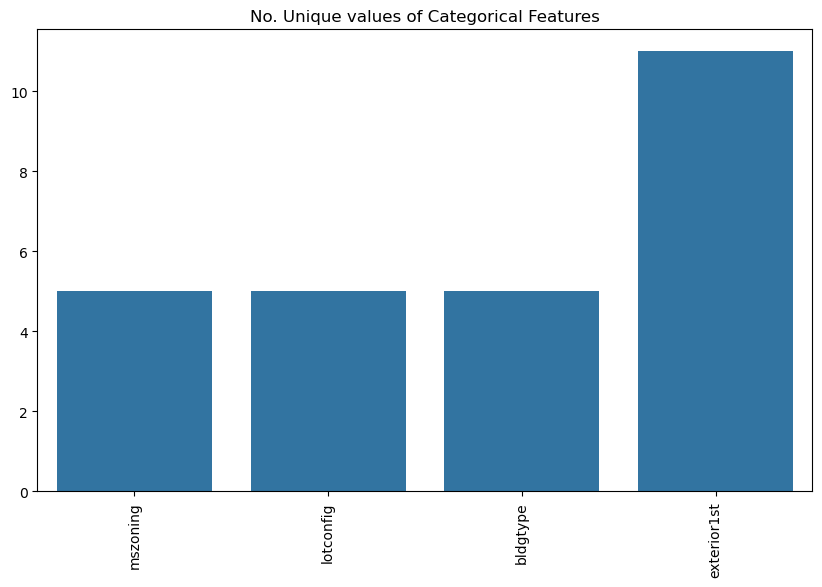

In [18]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

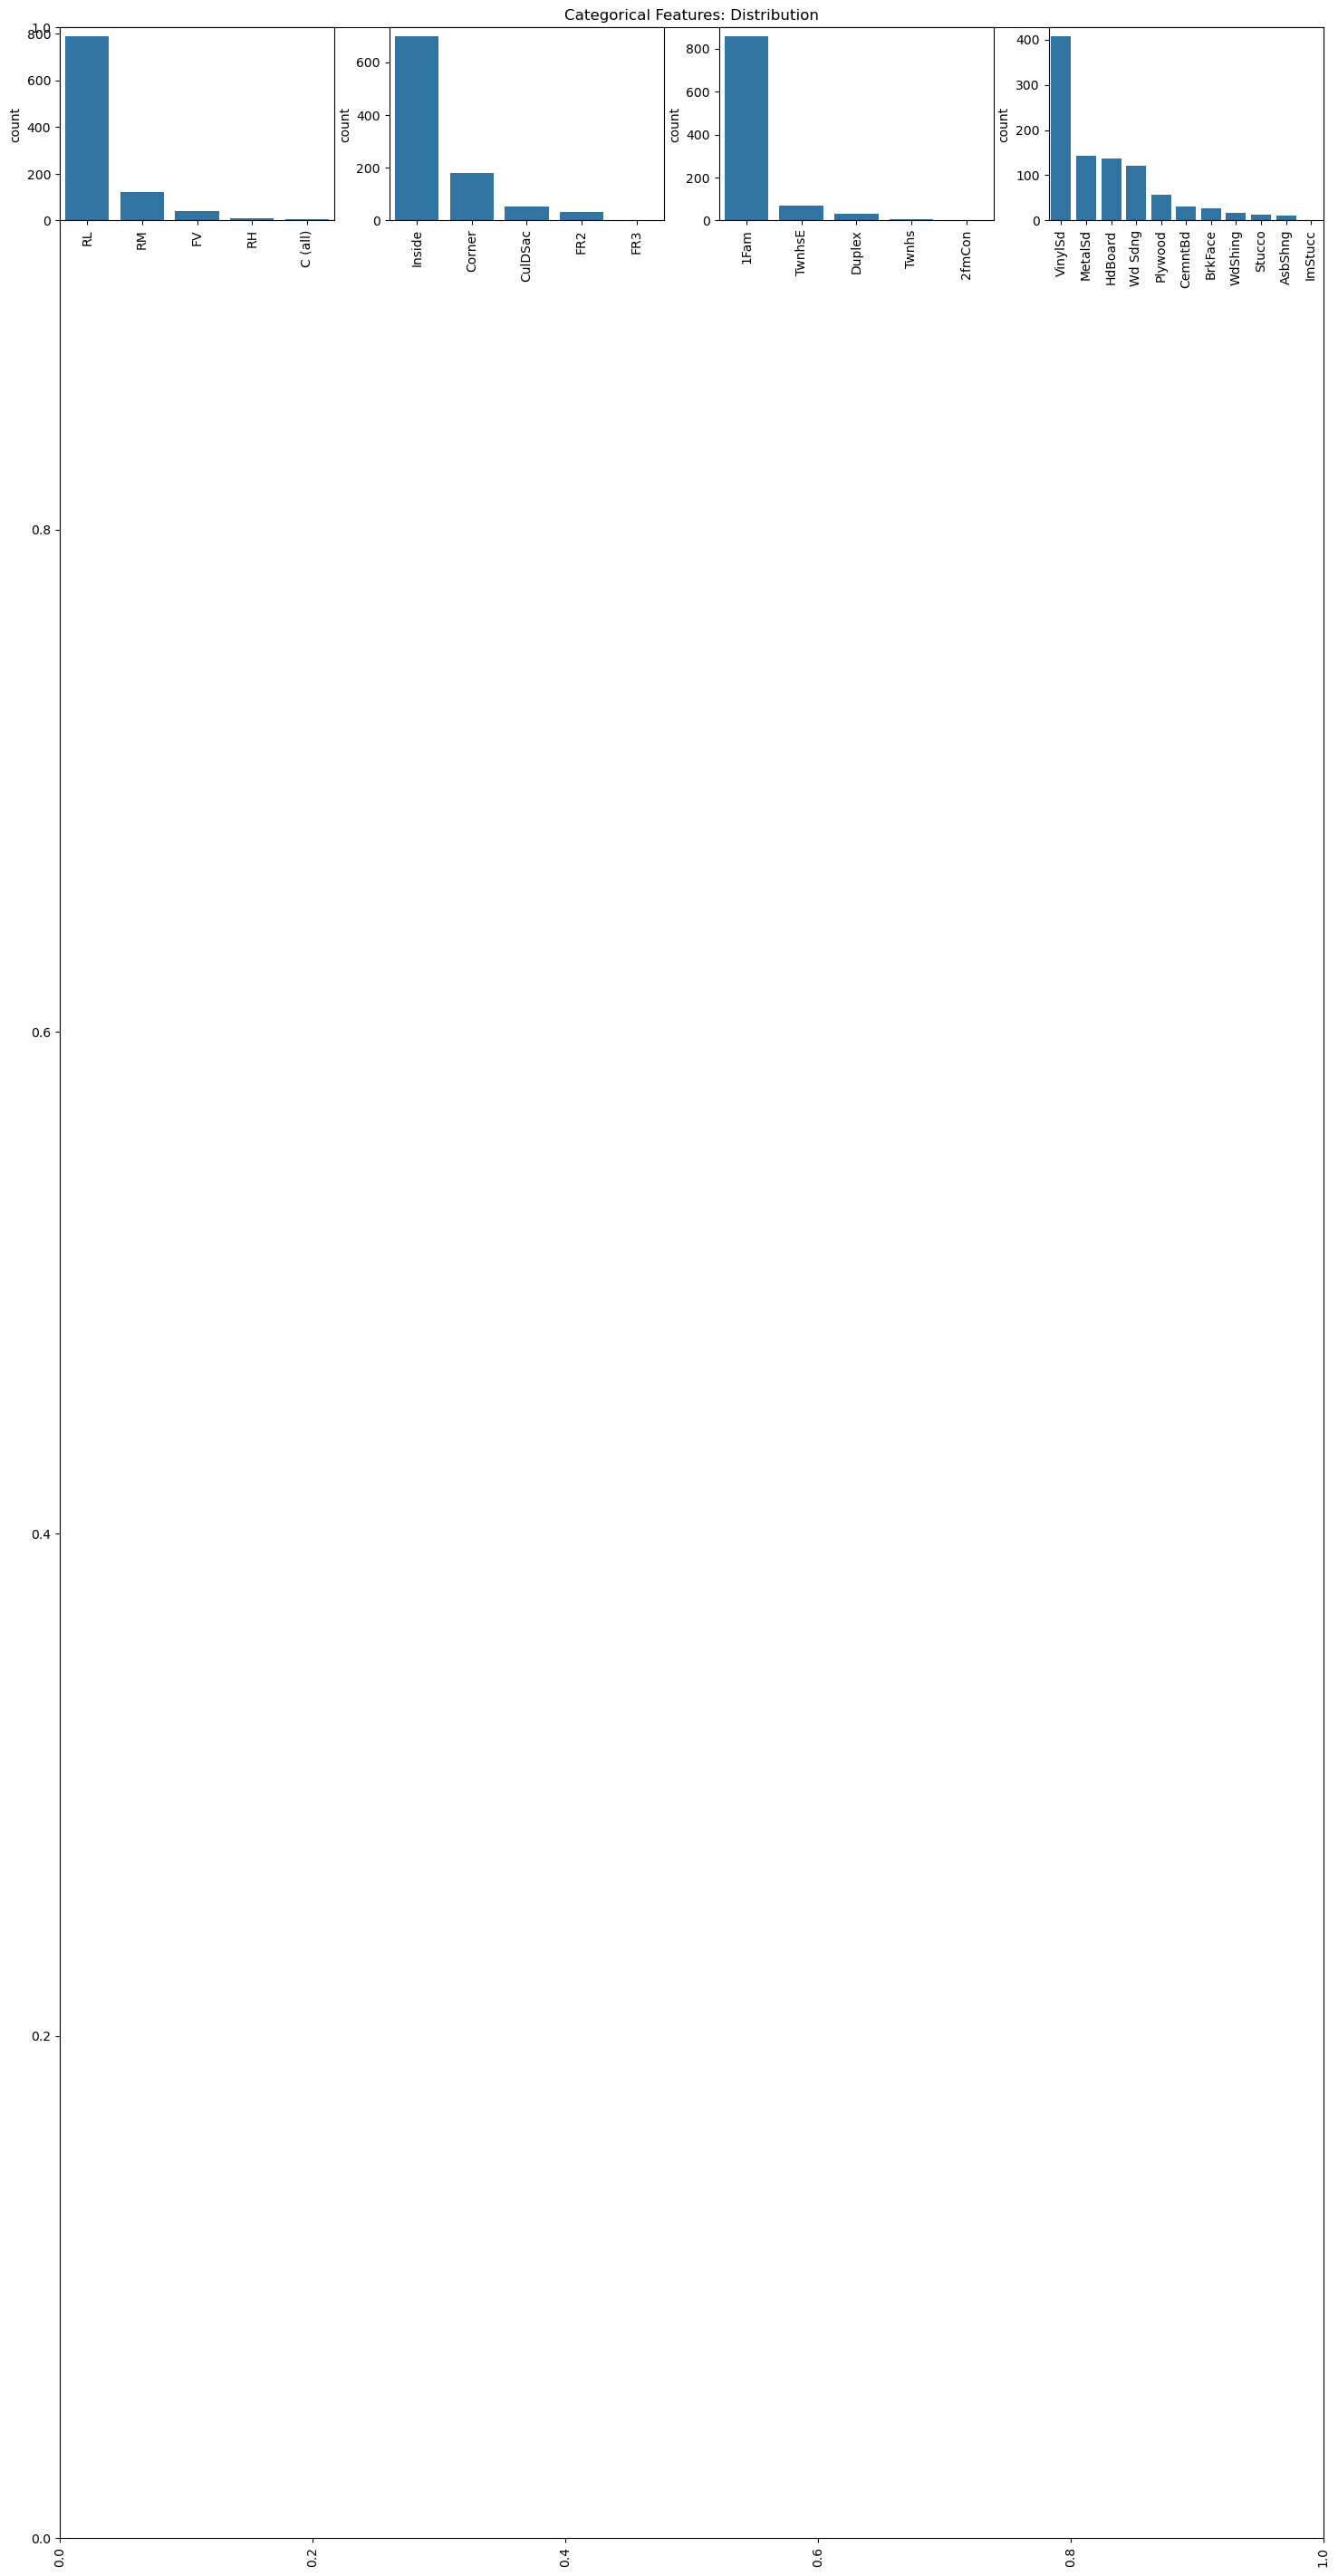

In [19]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


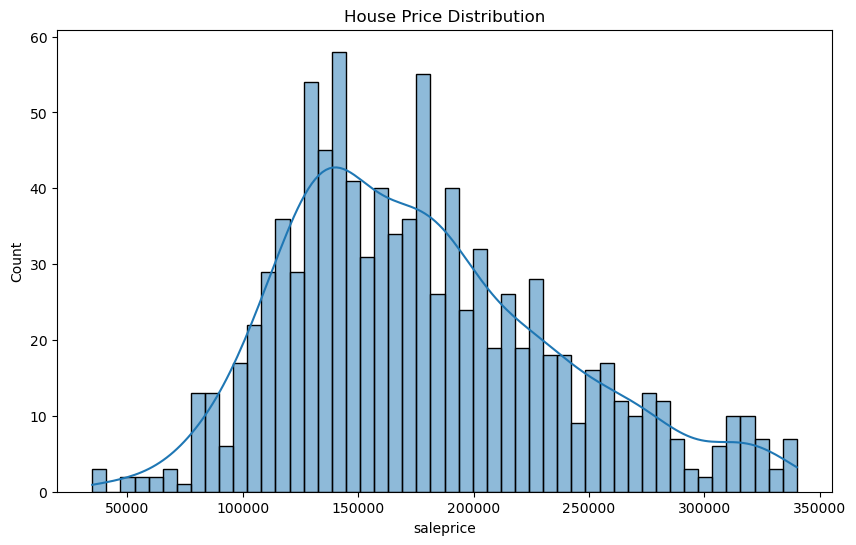

In [20]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.histplot(df['saleprice'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()


In [21]:
# Step 5: One-Hot Encoding Categorical Variables


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
categorical_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Drop original categorical columns and concatenate the new encoded columns
df = df.drop(columns=cat_cols).reset_index(drop=True)
df = pd.concat([df, categorical_encoded], axis=1)


<Axes: >

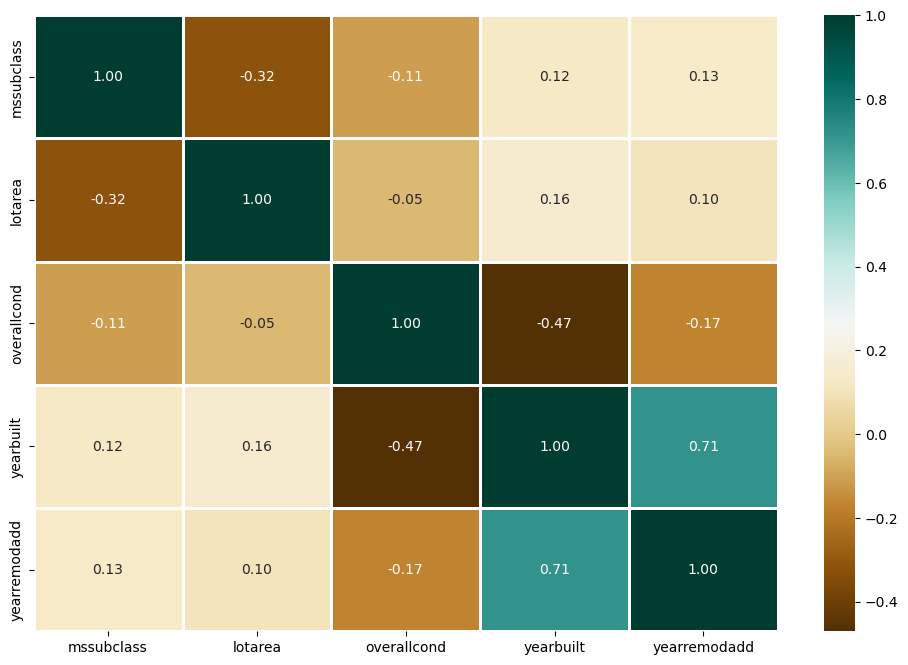

In [22]:
# Select only numerical features for correlation analysis
num_cols = df.select_dtypes(include=['int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [23]:
df

,mssubclass,lotarea,overallcond,yearbuilt,yearremodadd,bsmtfinsf2,totalbsmtsf,saleprice,mszoning_C (all),mszoning_FV,...,exterior1st_BrkFace,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50,14115,5,1993,1995,0.0,796.0,143000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,90,9000,5,1974,1974,0.0,896.0,136000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
962,20,9262,5,2008,2009,0.0,1573.0,287090.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963,20,17217,5,2006,2006,0.0,1140.0,84500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
964,20,7500,5,2004,2005,0.0,1221.0,185000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['saleprice'], axis=1)
Y = df['saleprice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split( X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [25]:
print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)

(772, 33) (194, 33) (772,) (194,)


In [26]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_valid)

In [27]:
# Step 8: Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf')
}

best_model = None
best_r2 = float('-inf')

for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(Y_valid, y_pred)
    print(f"{name} R² Score: {r2:.4f}")
    if r2 > best_r2:
        best_r2 = r2
        best_model = name

#print(f"Best Model: {best_model} with R² Score: {best_r2:.4f}")

Linear Regression R² Score: 0.6741
Lasso Regression R² Score: 0.6741
Random Forest R² Score: 0.7806
Support Vector Machine R² Score: -0.0221
